In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
X = pd.read_csv('/Users/dhruvpai/Downloads/practicals/CC GENERAL.csv')

In [5]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
# Handling the missing values
X.fillna(method ='ffill', inplace = True)

/var/folders/9j/bw9yqrxj5h369mrl2hzrdgbm0000gn/T/ipykernel_79807/2567943926.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


In [10]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Normalizing the data so that the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

In [13]:
# Converting the numpy array into a pandas
DataFrameX_normalized = pd.DataFrame(X_normalized)

In [14]:
# Reducing the dimensionality of the Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

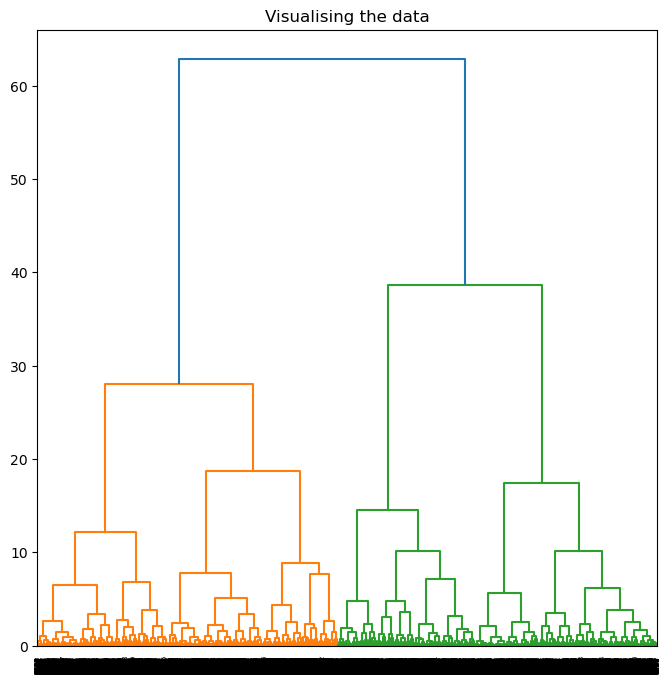

In [15]:
# Visualizing theworking of the Dendrograms
# Dendrograms are used to divide a given clusterinto many different clusters
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

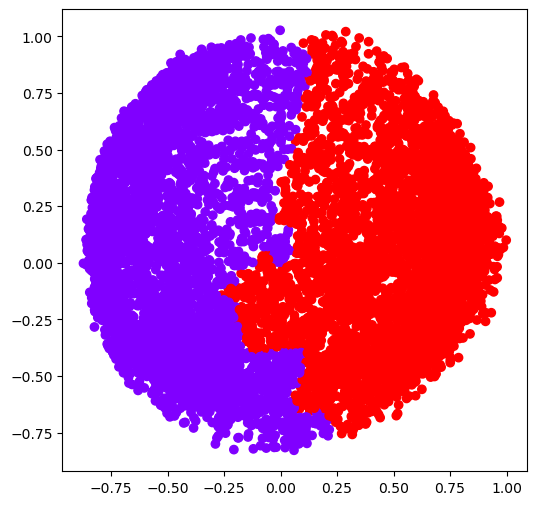

In [16]:
# Building and Visualizing the different clustering models for different values of k
# k = 2
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

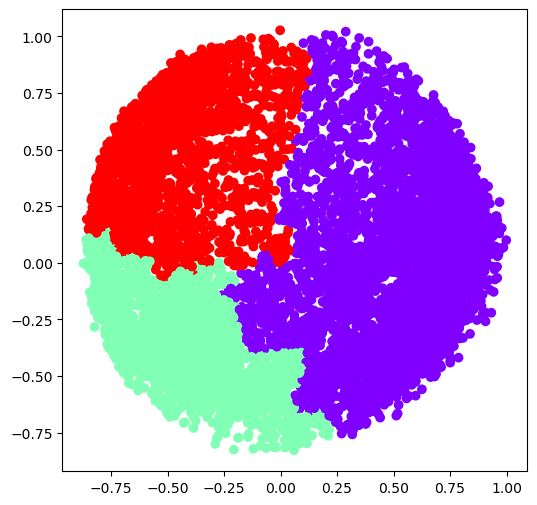

In [17]:
# k = 3
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

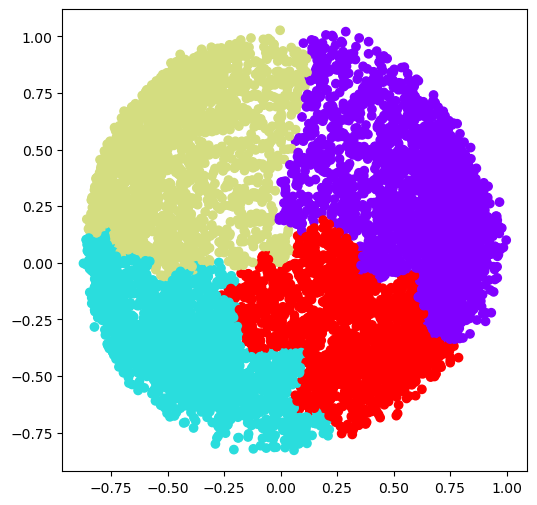

In [18]:
# k = 4
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

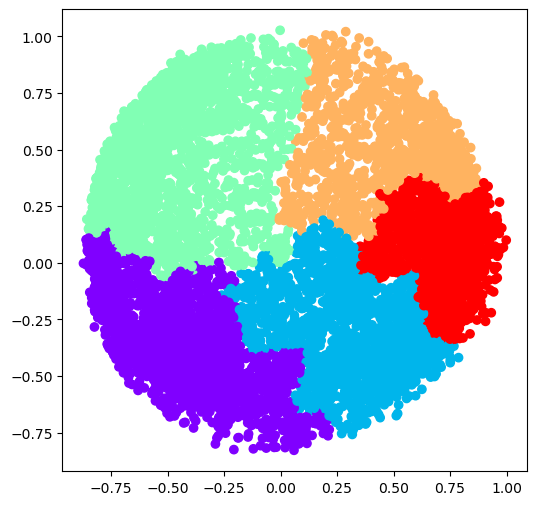

In [19]:
# k = 5
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

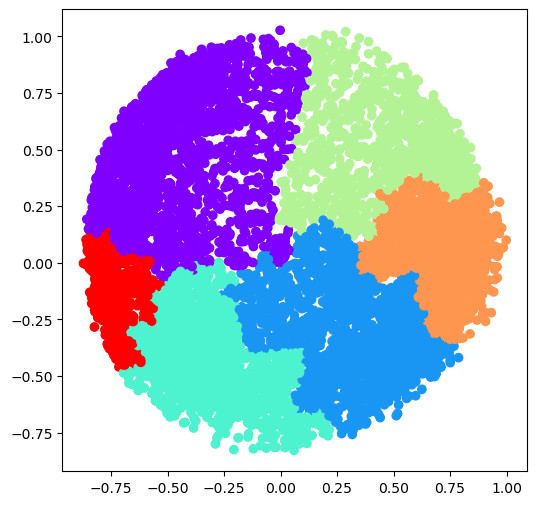

In [20]:
# k = 6
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [21]:
# Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]

In [22]:
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))
print(silhouette_scores)

[0.43236765701318425, 0.42784471513079997, 0.37465864788976655, 0.3551247071207091, 0.3168588200315746]


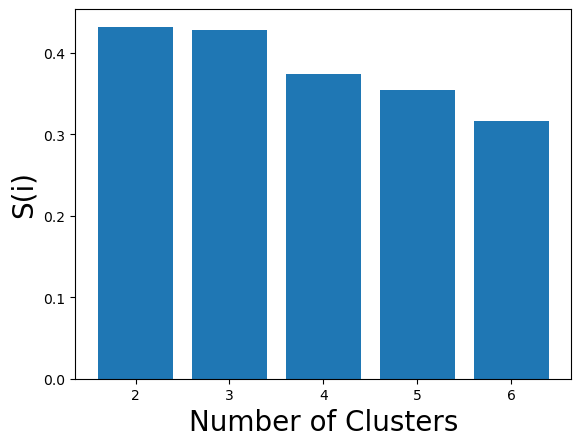

In [23]:
# Plotting a bar graph to compare the results
plt.bar(k,silhouette_scores)
plt.xlabel('Number of Clusters', fontsize = 20)
plt.ylabel('S(i)',fontsize = 20)
plt.show()

1. Data Preprocessing

- Importing the Dataset: The data is loaded using pd.read_csv() into X. It contains information for clustering analysis (in this example, possibly customer data).
Handling Missing Values: Missing values are filled forward using X.fillna(method='ffill'), which replaces NaN values with the preceding non-NaN value, maintaining data continuity.
- Scaling: StandardScaler() is used to standardize features, giving them a mean of 0 and a standard deviation of 1. This step is crucial because it ensures that all features contribute equally to the analysis, especially important for clustering.
- Normalization: normalize() transforms the scaled data so that each data point is of unit length, making it fit Gaussian (normal) distribution characteristics, which can improve clustering performance.

2. Dimensionality Reduction using PCA

- Principal Component Analysis (PCA): PCA is applied to reduce the dataset to two dimensions (principal components P1 and P2). This helps in visualizing the clusters in 2D, capturing the variance in the data in a compressed form.
- Result Storage: The transformed data (X_principal) is stored in a DataFrame with columns P1 and P2 for easy reference in later steps.

3. Visualizing with Dendrograms

- Dendrogram Construction: A dendrogram is generated using shc.dendrogram() with the linkage method set to 'ward'. This hierarchical clustering method minimizes the variance within clusters, giving a visual representation of the hierarchical clustering process.
- Purpose: The dendrogram aids in determining a reasonable number of clusters (k value) by observing where the longest vertical lines in the dendrogram split.

4. Agglomerative Clustering with Different Cluster Counts

- Agglomerative Clustering: For each specified k (number of clusters), an AgglomerativeClustering model is created and fitted on X_principal. This type of hierarchical clustering starts by treating each data point as its own cluster and merges the closest clusters iteratively until k clusters remain.
- Visualization: Each clustering result is visualized by plotting P1 and P2 with colors assigned to clusters, helping to observe the cluster separation for each value of k.

5. Model Evaluation with Silhouette Scores

- Silhouette Score Calculation: The silhouette score for each k is calculated using silhouette_score(). This score assesses how well clusters are separated: values close to 1 indicate well-separated clusters, while values near 0 imply overlapping clusters. This evaluation helps in selecting the optimal k.
- Comparison: A bar plot of silhouette scores for each k value visually compares clustering performance, making it easier to identify the most suitable cluster count based on separation quality.

6. Algorithm Insights:

- PCA: Reduces the data complexity for visualizing high-dimensional data in 2D while retaining significant variance.
- Agglomerative Clustering: A hierarchical approach that forms a tree structure of nested clusters, ideal for identifying natural groupings in the data.
- Silhouette Analysis: Evaluates cluster quality by measuring both intra-cluster cohesion and inter-cluster separation, guiding toward an optimal k.


Questions : 
----

1. What is meant by the Agglomerative Hierarchical Clustering algorithm?
- Agglomerative Hierarchical Clustering is a bottom-up clustering technique. It starts by treating each data point as an individual cluster, and then iteratively merges the closest clusters based on a certain distance metric. The process continues until all data points belong to a single cluster or until a specified number of clusters is achieved. This method generates a hierarchy of clusters, which can be visualized using a dendrogram. The main advantage of this algorithm is that it doesn't require the number of clusters to be pre-specified, and it can capture hierarchical relationships in the data.

2. Which is the ready-made function available to build Agglomerative Hierarchical Clustering?

In Python, the AgglomerativeClustering class from the sklearn.cluster module is used to perform agglomerative hierarchical clustering. This function allows you to specify the number of clusters you want, the distance metric to use, and the linkage method (such as "ward", "average", or "complete").
- Example usage:  
- from sklearn.cluster import AgglomerativeClustering
- model = AgglomerativeClustering(n_clusters=3, linkage='ward')

3. Tell me the steps to implement the Agglomerative Hierarchical Clustering algorithm.
- To implement Agglomerative Hierarchical Clustering, follow these general steps:
- Prepare the Data:Load and clean your dataset (remove missing values, handle categorical data, etc.). Standardize the data if necessary (e.g., using StandardScaler for feature scaling).
- Calculate Pairwise Distances: Start by computing the pairwise distances between all the data points. The distance metric can be Euclidean, cosine, or others depending on the problem.
- Create a Distance Matrix: Build a distance matrix that shows how far apart each pair of data points is.
- Merge Clusters: Initially, treat each data point as its own cluster. Identify the two clusters that are closest (based on the distance matrix) and merge them into a single cluster. Repeat this process, at each step merging the closest clusters, until the desired number of clusters is achieved or all points belong to one cluster.
- Visualize the Dendrogram (optional): Use a dendrogram to visualize the hierarchy of clusters and help decide how many clusters to choose.
- Choose the Number of Clusters: If you have a specific number of clusters in mind, specify it when you initialize the model. Alternatively, you can use the dendrogram to find the optimal number of clusters based on the visual structure.
- Assign Cluster Labels: Once the clustering is done, you can assign cluster labels to each data point using the labels_ attribute.

4. Applications of Agglomerative Hierarchical Clustering algorithm:
Agglomerative Hierarchical Clustering can be used in a variety of applications, including but not limited to:

- Customer Segmentation: In marketing, hierarchical clustering is used to segment customers based on their purchasing behavior, demographics, or browsing patterns.
Document or Text Clustering: Hierarchical clustering is applied to group similar documents or texts together based on their content. This is useful in natural language processing tasks like topic modeling or organizing large datasets of text.
- Image Segmentation: It can be used in image processing to group similar pixels together. This is useful for tasks like object detection or image compression.
- Biological Data Analysis: In bioinformatics, hierarchical clustering is used to group genes or proteins with similar expression patterns, helping in gene function prediction or identifying patterns in biological experiments.
- Anomaly Detection: By analyzing the structure of clusters, outliers or anomalies can be detected as data points that do not fit into any cluster well.
- Hierarchical Organization of Data: For any dataset where natural hierarchical relationships exist (e.g., taxonomies), agglomerative hierarchical clustering helps uncover those relationships, providing valuable insights for further analysis.
